# Mapping the Purple Air Locations
We need to create some nice graphics for the purple airs. This notebook takes care of that process.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importing the Locations

In [3]:
info = pd.read_csv('../references/PurpleAir_IDs.csv')
info

,MAC Address,IEL Label,UT ITS Label,Emergency Call Box,Call Box Description,Latitude,Longitude,Name,Registered,Notes
0,84:F3:EB:6F:6A:1A,6A1A,2,20.0,San Jac/24th,30.287293,-97.733449,PA_II_6A1A,True,NaN
1,84:F3:EB:37:DA:7A,DA7A,3,19.0,Speedway/24th,30.287216,-97.736966,PA_II_DA7A,True,NaN
2,84:F3:EB:37:D4:4F,D44F,4,61.0,I-35/Comal,30.282121,-97.726869,PA_II_D44F,True,NaN
3,84:F3:EB:37:D7:1C,D71C,5,82.0,LBJ Library,30.285305,-97.728241,PA_II_D71C,True,NaN
4,84:F3:EB:37:D7:18,D718,6,41.0,MLK/Brazos,30.280028,-97.732507,PA_II_D718,True,NaN
5,84:F3:EB:37:D7:27,D727,7,50.0,BMA,30.281025,-97.737099,PA_II_D727,True,NaN
6,84:F3:EB:37:D8:BE,D8BE,8,NaN,Whitis Court LLB,30.290632,-97.740244,PA_II_D8BE,True,NaN
7,84:F3:EB:37:D8:B6,D8B6,9,23.0,Stadium Bus Stops,30.285069,-97.732877,PA_II_D8B6,True,NaN
8,84:F3:EB:37:E6:D8,E6D8,10,80.0,SEA,30.289410,-97.736607,PA_II_E6D8,True,NaN
9,84:F3:EB:38:0D:A2,0DA2,11,39.0,Baseball Stadium,30.279041,-97.725929,PA_II_0DA2,True,NaN


## Creating the map

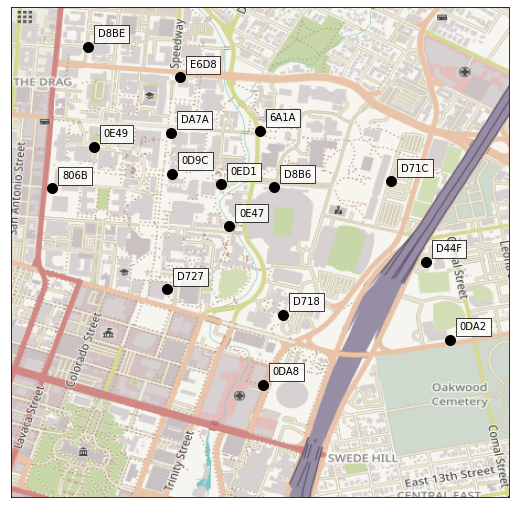

In [24]:
# setting perimeter bounds
BBox = (-97.7433,-97.7236,30.2728,30.2922)
x_width = BBox[1]-BBox[0]
y_width = BBox[3]-BBox[2]
austin_m = plt.imread('../images/austin_map.png')
#451, 514 dims from screenshot
fig, ax = plt.subplots(figsize=(10.28,9.02))
# plotting points
ax.scatter(info['Longitude'],info['Latitude'],color='black',s=100)

for i in range(len(info['Name'])):
    t = ax.text(info['Longitude'][i]+0.02*x_width,info['Latitude'][i]+0.02*y_width,info['Name'][i][-4:])
    t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='black'))

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_yticks([])
ax.set_xticks([])
ax.imshow(austin_m, zorder=0, extent = BBox, aspect= 'equal')

plt.savefig('../images/pa_sites.pdf',bbox_inches='tight')
plt.show()
plt.close()